Bias correction with BiasCorrection and XBiasCorrection
https://pankajkarman.github.io/bias_correction/index.html

In [1]:
from bias_correction import XBiasCorrection
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
obs_data = np.random.randn(2*365, 34, 65)
model_data = np.random.randn(2*365, 34, 65)
sce_data = np.random.randn(365, 34, 65)

lat = range(34)
lon = range(65)

obs_data = xr.DataArray(obs_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
model_data = xr.DataArray(model_data, dims=['time','lat','lon'], \
                          coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
sce_data = xr.DataArray(sce_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2019-01-01', '2019-12-31', freq='D'), lat, lon])

# combining dataarrays to form dataset with same timelength otherwise correction will give error
ds = xr.Dataset({'model_data':model_data,'obs_data':obs_data, 'sce_data':sce_data})
ds['sce_data']

<xarray.DataArray 'sce_data' (time: 1095, lat: 34, lon: 65)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
        [ 4.31366905e-01, -7.96332953e-01,  2.06057780e+00, ...,
          7.86645715e-01, -6.48152597e-02,  3.77239944e-01],
        [ 4.40200792e-01, -1.00356229e+00,  8.84866889e-01, ...,
          2.96181376e-01, -8.11863427e-01, -1.85928790e+00],
        [ 3.16660716e+00,  4.85648253e-01, -1.04906662e+00, ...,
          1.72059679e-01, -6.27719040e-01,  4.29852585e-01]],

       [[-2.86993337e-01,  6.14079750e-01, -3.00892045e-04, ...,
          9.90053190e-02, -7.28599454e-01, -7.62984793e-01],
        [-8.54638712e-01, -1.06417723e+00,  9.12014674e-02, ...,
          2.48487864e+00, -5.42085659e-01, -1.34774315e+00],
        [ 4.19462647e-01, -6.90036199e-01, -7.92658866e-02, ...,
          1.80005422e+00,  1.69211724e-01, -1.08076594e+00],
        ...,
        [ 2.54836454e-01,  3.28939427e-01, -6.78165331e-02, ...,
          2.64392211e-01, -2.67142699e-01, -5.36892857e-01],
        [-1.68964359e-01,  7.67874590e-02,  6.33622803e-01, ...,
         -8.50763059e-01,  1.17431971e+00,  7.15056897e-01],
        [ 1.36363869e+00, -3.96464628e-01,  4.19017311e-01, ...,
         -7.30084373e-01, -4.91426745e-01, -1.63194022e+00]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat      (lat) int32 0 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32 33
  * lon      (lon) int32 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63 64

In [6]:
ds['obs_data']

<xarray.DataArray 'obs_data' (time: 1095, lat: 34, lon: 65)>
array([[[ 1.00841136e+00, -1.50884476e+00,  1.42654144e+00, ...,
         -1.01535379e+00, -6.58482010e-01, -1.23913752e+00],
        [-9.73344366e-01,  1.31440219e+00, -1.57594133e-01, ...,
          6.92270597e-01, -1.31419267e+00, -1.04358552e+00],
        [-5.60890242e-02,  1.57697811e+00, -3.64590920e-01, ...,
         -2.05705237e-01, -4.47200388e-01, -1.69102879e+00],
        ...,
        [ 6.86437925e-01, -5.56544228e-01, -1.80033921e+00, ...,
         -5.30662187e-01,  1.18330956e+00,  4.87151125e-01],
        [ 4.69589761e-01,  9.32081318e-01,  7.48996829e-01, ...,
         -8.40704621e-02,  6.22726010e-01,  6.03867432e-01],
        [-1.29423349e-02, -2.08640454e-01,  8.25693407e-01, ...,
          8.23392970e-01,  4.33933103e-01,  1.38120276e+00]],

       [[-4.20950805e-01,  2.00499082e-02, -1.59872238e+00, ...,
         -1.44448087e-03, -4.45771849e-01,  1.49828678e-01],
        [-9.53645815e-01, -8.02065719e-01, -5.95377596e-01, ...,
         -6.43214958e-01,  8.41968664e-01,  5.10468412e-01],
        [ 1.35525516e-01, -1.39691109e+00, -7.03606716e-01, ...,
          2.23493623e+00, -2.26046114e-01,  6.56609770e-02],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat      (lat) int32 0 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32 33
  * lon      (lon) int32 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63 64

In [7]:
ds['model_data']

<xarray.DataArray 'model_data' (time: 1095, lat: 34, lon: 65)>
array([[[-0.18019593,  0.11145785, -1.25003722, ...,  0.68953379,
         -0.85082075,  1.28388558],
        [ 0.36840118, -1.1042346 , -1.91843684, ..., -0.55643056,
          0.94034929,  0.86757999],
        [-0.47236899, -1.41289003, -0.02505367, ...,  0.28144599,
         -1.21757133,  0.05320131],
        ...,
        [ 0.43026794,  0.74701528,  2.63590789, ..., -1.52816575,
          1.21968234,  0.98132441],
        [-0.65962319, -0.27384129, -0.42845481, ...,  0.53366215,
         -0.15993375,  0.11821834],
        [-0.03256679,  0.70398547,  0.07192008, ...,  2.23937387,
         -0.45296833, -1.57048474]],

       [[ 1.68100638,  1.02062726, -0.89072284, ...,  0.35587581,
          2.24439985, -1.54357207],
        [-0.61159247, -0.82984433, -0.24822211, ...,  0.9874    ,
         -1.33028408, -2.10642766],
        [-1.08420776,  0.01770378, -0.36373124, ...,  1.01367597,
         -1.08257935, -0.23245203],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat      (lat) int32 0 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32 33
  * lon      (lon) int32 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63 64

In [8]:
ds

<xarray.Dataset>
Dimensions:     (time: 1095, lat: 34, lon: 65)
Coordinates:
  * time        (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat         (lat) int32 0 1 2 3 4 5 6 7 8 9 ... 25 26 27 28 29 30 31 32 33
  * lon         (lon) int32 0 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Data variables:
    model_data  (time, lat, lon) float64 -0.1802 0.1115 -1.25 ... nan nan nan
    obs_data    (time, lat, lon) float64 1.008 -1.509 1.427 ... nan nan nan
    sce_data    (time, lat, lon) float64 nan nan nan ... -0.7301 -0.4914 -1.632

In [3]:
bc = XBiasCorrection(ds['obs_data'], ds['model_data'], ds['sce_data'])
# df1 = bc.correct(method='modified_quantile')
# df2 = bc.correct(method='basic_quantile')
df3 = bc.correct(method='gamma_mapping')

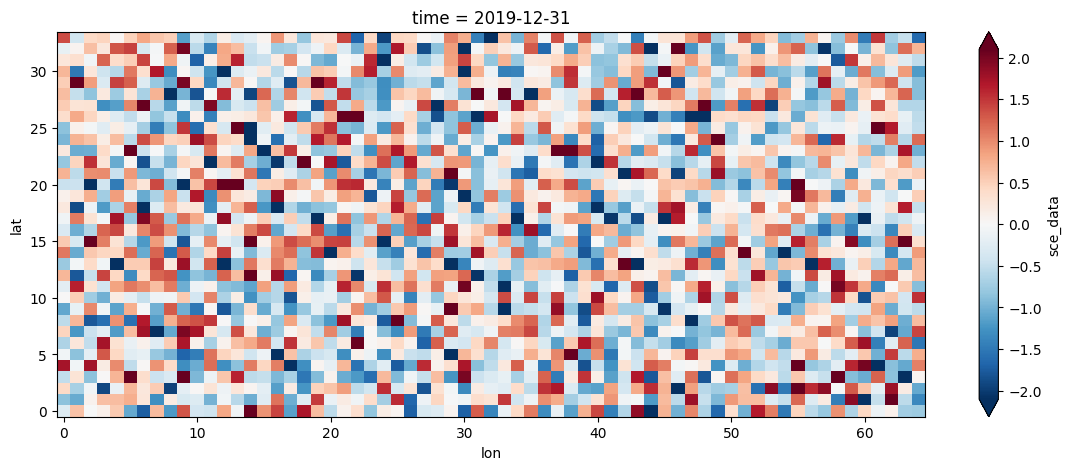

In [4]:
bc.sce_data.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()

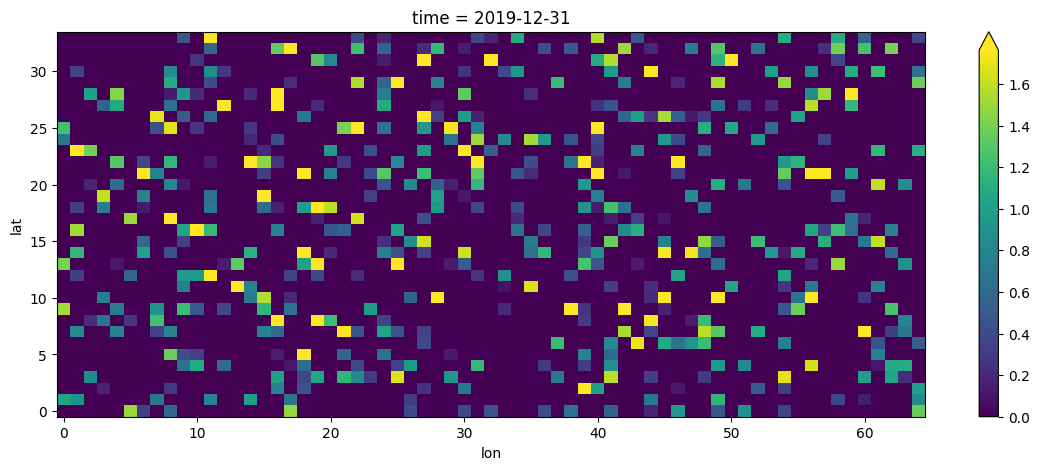

In [5]:
df3.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()

In [9]:
df3

<xarray.DataArray (lat: 34, lon: 65, time: 1095)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.56942063,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.28234053,
         0.        , 1.35005964]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.04656993],
        [0.        , 0.        , 0.        , ..., 0.        ,
         1.15626413, 0.91052012],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.16754061, 0.        ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.39186104],
        [0.        , 0.        , 0.        , ..., 0.        ,
         1.07428692, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.29798475, 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 2.13320137,
         1.11589369, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.35374581]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat      (lat) int32 0 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32 33
  * lon      (lon) int32 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63 64

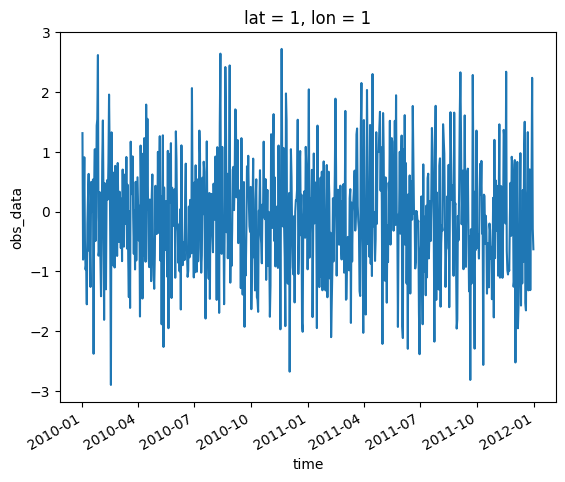

In [11]:
ds['obs_data'].isel(lat=1,lon=1).plot()

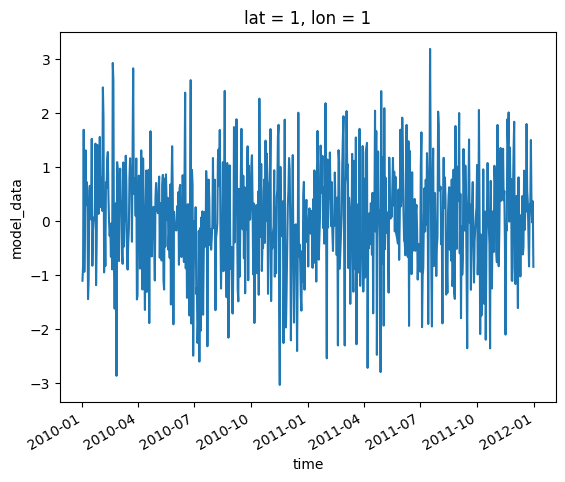

In [12]:
ds['model_data'].isel(lat=1,lon=1).plot()

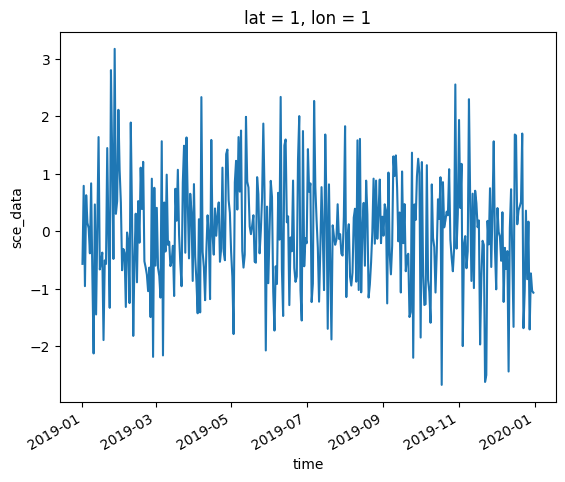

In [13]:
ds['sce_data'].isel(lat=1,lon=1).plot()

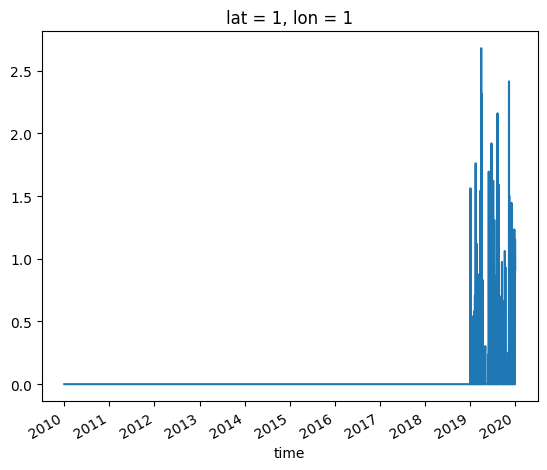

In [21]:
df3.isel(lat=1,lon=1).plot()

In [20]:
df3.isel(time='2018-01-01T00:00:00.000000000''2019-12-31T00:00:00.000000000')

SyntaxError: invalid syntax (909659285.py, line 1)

In [19]:
df3.time

<xarray.DataArray 'time' (time: 1095)>
array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ..., '2019-12-29T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31